# 1 - Problem Statement

Solve the mean-field $\alpha-\Omega$ dynamo equations in the kinematic regime. That is, include the $\Omega$ effect term in the equation for $\dfrac{\partial \bar{B}_\phi}{\partial t}$ and the $\alpha$ effect term in the equation for $\dfrac{\partial \bar{B}_r}{\partial t}$. This requires specifying the overall magnitude and spatial dependence of $\Omega$ and $\alpha$.
* Repeat the investigation you had done for task 1, with the new equations, for different values of the dynamo number, $D$
$$ D = − \dfrac{\alpha_0 q \Omega h^3}{\eta_t^2} $$
where $q = − \dfrac{d \ln \Omega}{d \ln r}$ and $\alpha_0 > 0$ is the amplitude of the $\alpha$ effect. Note that $q > 0$ if $\Omega$ decreases with $r$, which is generally the case in galaxies, so $D < 0$.
* The exponential decay becomes exponential growth if $|D| > |D_c|$, where $D_c$ is the critical dynamo number. Find the critical dynamo number numerically (ideally, you would automate this feature).
* Compare the growth rate you obtain for a given value of $D$ (for $|D| > |D_c|$) with the no-z solution prediction for the local growth rate $\gamma$. Do the same comparison for $D_c$ . Do the results agree with your expectations?

<hr><hr>


$$ \frac{\partial \bar{B}_r}{\partial t} = V_r \frac{\partial \bar{B}_z}{\partial z} - \frac{\partial (V_z \bar{B}_r)}{\partial z} - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} $$
$$ \frac{\partial \bar{B}_\phi}{\partial t} = r \Omega \frac{\partial \bar{B}_z}{\partial z} - \frac{\partial (V_z \bar{B}_\phi)}{\partial z} + \frac{\partial (\alpha \bar{B}_r)}{\partial z} + \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} $$
$$$$
$$ \frac{\partial \bar{B}_r}{\partial t} = - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} $$
$$ \frac{\partial \bar{B}_\phi}{\partial t} = -q \Omega \bar{B}_r + \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} $$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from my_code import *
from plotting import *

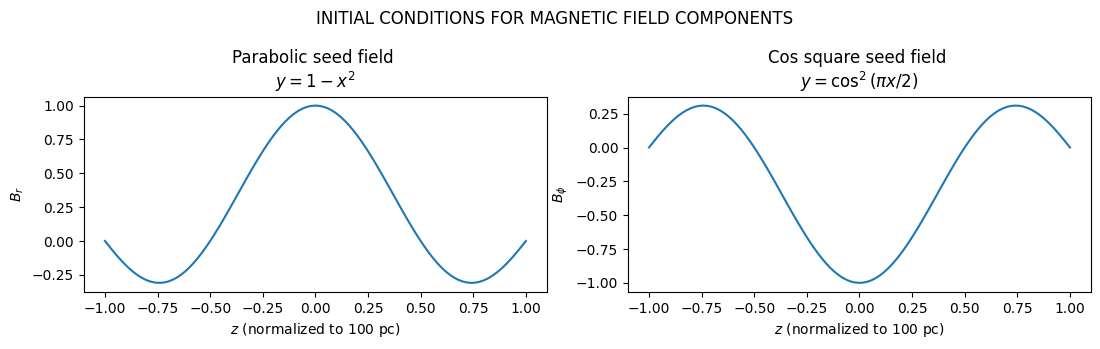

In [5]:
def init_cond_Br(x):
    return (1-x**2)*np.cos(np.pi*x) #(1-x**2)*np.cos(2*np.pi*x)

def init_cond_Bphi(x):
    return -(1-x**2)*np.cos(np.pi*x)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)
title_1 = r'Parabolic seed field '+'\n'+r'$ y = 1-x^2$'
title_2 = r'Cos square seed field '+'\n'+r'$ y = \cos^2(\pi x/2)$'
global_title = 'INITIAL CONDITIONS FOR MAGNETIC FIELD COMPONENTS'

plot_init_cond(z, init_cond_Br, init_cond_Bphi, title_1, title_2, global_title)
plt.show()


In [6]:
# Constants and parameters
eta_T = 3.48e-3    # magnetic diffusivity
alpha = 0.02    # alpha effect
Omega = 0.4
q = 0.1
t_max = 500     # total simulation time
z_min = -1.0     # minimum thickness of the disc
z_max = 1.0     # thickness of the disc
dt = t_max/200       # time step
dz = 0.01       # spatial step in z direction

# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
solution = crank_nicolson_mod(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = solution[:len(z), :]
B_phi = solution[len(z):, :]


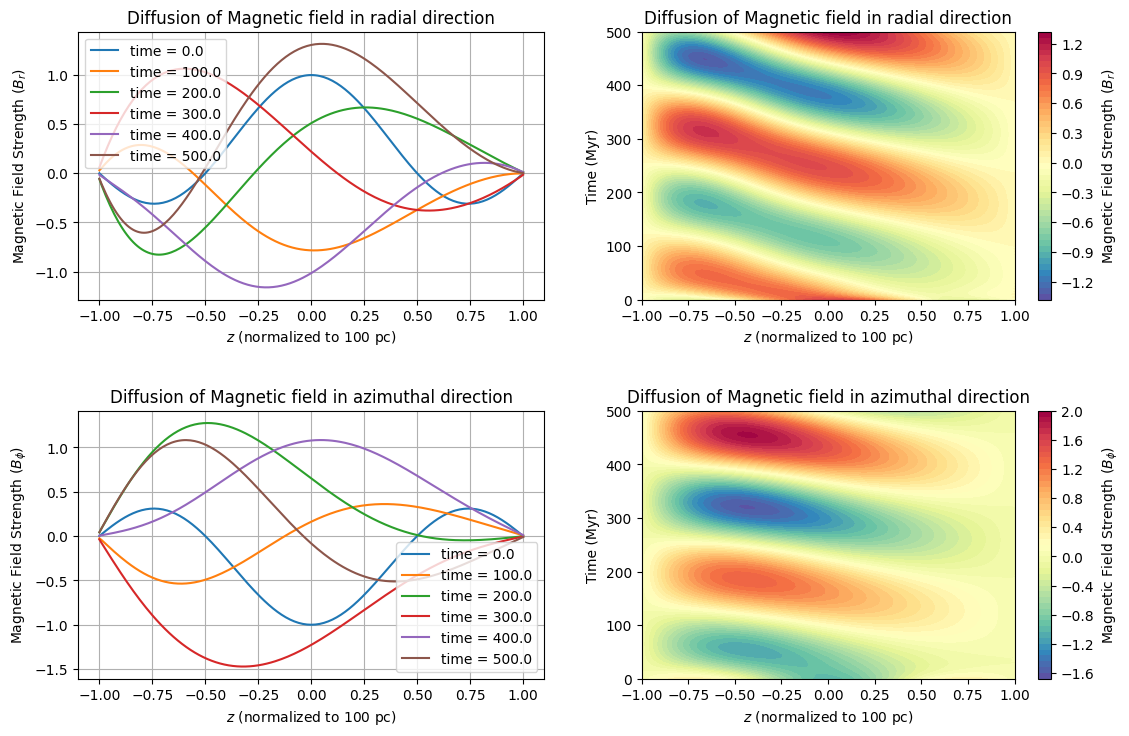

In [7]:
# Plot the solution in imshow
plot_diff(t, z, B_r, B_phi)
plt.show()